In [1]:
#Ensemble Methods: Use the optimized decision tree and random forest models within ensemble methods.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset from a CSV file
data = pd.read_csv("../Resources/HousingData.csv")
clean_data = data.dropna()

In [4]:
# Extract the features (X) and target variable (y)
X = clean_data.drop("MEDV", axis=1).values
y = clean_data["MEDV"].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = 1 - (linear_regression_mse / y_test.var())

In [8]:
# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = 1 - (decision_tree_mse / y_test.var())

In [9]:
# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = 1 - (random_forest_mse / y_test.var())

In [10]:
# Ensemble Methods
optimized_decision_tree = DecisionTreeRegressor()  # Replace with your optimized decision tree model
optimized_random_forest = RandomForestRegressor()  # Replace with your optimized random forest model

In [11]:
# Bagging ensemble of decision trees
bagging_model = BaggingRegressor(base_estimator=optimized_decision_tree, n_estimators=10)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_mse = mean_squared_error(y_test, bagging_predictions)
bagging_r2 = 1 - (bagging_mse / y_test.var())

/Users/jnellniz/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [12]:
# Evaluate the models
print("Linear Regression R-squared:", linear_regression_r2)
print("Decision Tree R-squared:", decision_tree_r2)
print("Random Forest R-squared:", random_forest_r2)
print("Bagging R-squared:", bagging_r2)

Linear Regression R-squared: 0.6270849941673176
Decision Tree R-squared: 0.6842857654140897
Random Forest R-squared: 0.6635024787310569
Bagging R-squared: 0.6864841733198956


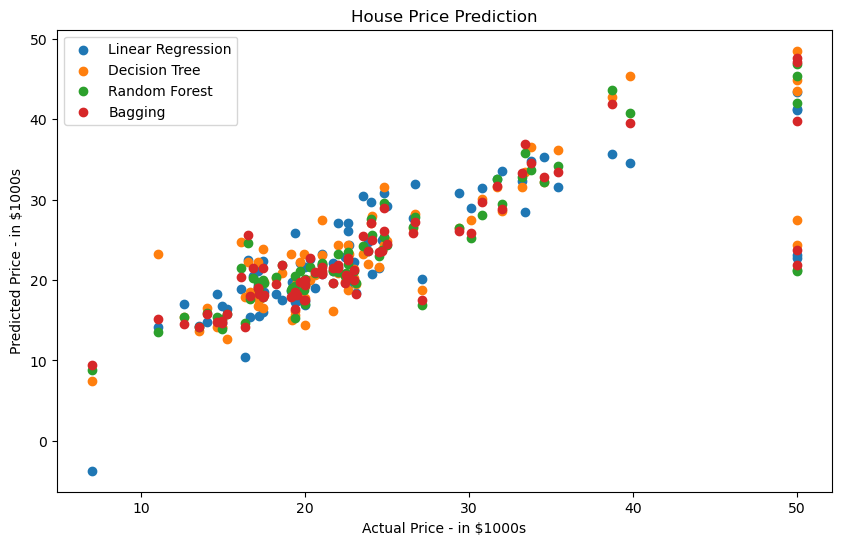

In [13]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_predictions, label='Linear Regression')
plt.scatter(y_test, decision_tree_predictions, label='Decision Tree')
plt.scatter(y_test, random_forest_predictions, label='Random Forest')
plt.scatter(y_test, bagging_predictions, label='Bagging')
plt.xlabel('Actual Price - in $1000s')
plt.ylabel('Predicted Price - in $1000s')
plt.title('House Price Prediction')
plt.legend()
plt.show()